In [1]:
import numpy as np
import pandas as pd

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def plotConfusion(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Developed','Developing']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [3]:
data_poverty = pd.read_csv('Poverty-output.csv')
data_internet = pd.read_csv('Internet-Output.csv')
data_gdp = pd.read_csv('Gdp-output.csv')
data_military = pd.read_csv('Military-output.csv')
data_agriculture = pd.read_csv('Agriculture-output.csv')
data_health = pd.read_csv('Health-Output.csv')

In [4]:
import pandas as pd
df = pd.concat([data_poverty,data_internet,data_gdp,data_military,data_agriculture,data_health])

In [5]:
df.shape

(1277, 797)

In [6]:
df.label.value_counts()

1    1070
0     207
Name: label, dtype: int64

In [7]:
y = df['label']
X = df.drop(columns=['Unnamed: 0', 'id','label'])

In [8]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

[0.8200666794511307, 0.7799160813802789, 0.8258861797425923, 0.826965234780191, 0.8347373155495865, 0.8394599552308607, 0.8197226673543642, 0.8274194622877806, 0.8301826871313435, 0.8351571647629227, 0.8134515974788344, 0.8214512824876138, 0.8083881278851509, 0.805540589904474, 0.7975498172808716]


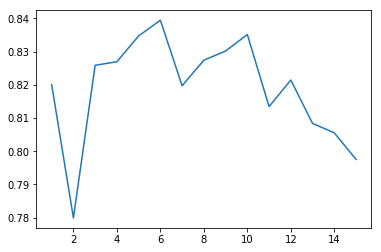

In [9]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,scores)    
print(scores) 

In [10]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
print(dsf)
f1 = f1_score(y_test,pred,average='weighted') 
print('F1 Score: ',f1)
acc = accuracy_score(y_test,pred)
print('Accuracy is: ',acc)
cm = confusion_matrix(y_test,pred)

             precision    recall  f1-score   support

          0       0.53      0.47      0.50        85
          1       0.90      0.92      0.91       426

avg / total       0.84      0.84      0.84       511

F1 Score:  0.8394599552308607
Accuracy is:  0.8434442270058709


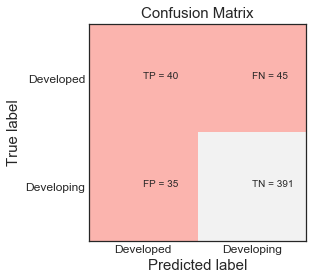

In [11]:
plotConfusion(cm)

#### Random Forest Classifier

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8910457281577447
Accuracy Score:  0.8943248532289628


5-------0.8744179625552494
10-------0.8910457281577447
15-------0.8779308391791618
20-------0.880950664332063
30-------0.8867702941071921
35-------0.8754133332187471
40-------0.8829048601989116
45-------0.8736918535196422
50-------0.8821401205867772
100-------0.8796366100587898
200-------0.8762663578151417
300-------0.8805330351318609
400-------0.8753916557230855
500-------0.8701589853913673
600-------0.8727870070135844
700-------0.8701589853913673


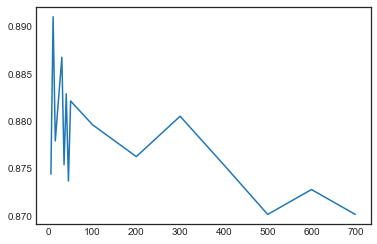

In [13]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300,400,500,600,700]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
for i in range (0,len(estimators)):
    print(str(estimators[i]) + "-------" + str(f1_scores[i]))

In [14]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8910457281577447
Accuracy Score:  0.8943248532289628


[0.8745409216416911, 0.8728748581150665, 0.882321444360737, 0.8725345012717166, 0.8686352158146903, 0.8593568694270408, 0.8729022397582371, 0.8635409619462316, 0.8682531254687994, 0.8749043545514847, 0.8701478006739168]


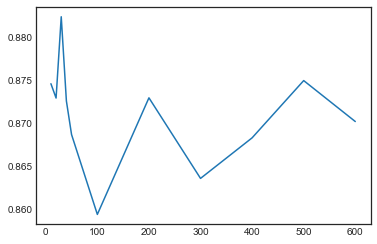

In [15]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=10,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [16]:
rf_classifier = RandomForestClassifier(n_estimators=10, max_features=30,random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)

F1 Score:  0.882321444360737
Accuracy Score:  0.8864970645792564


             precision    recall  f1-score   support

          0       0.69      0.58      0.63        85
          1       0.92      0.95      0.93       426

avg / total       0.88      0.89      0.88       511



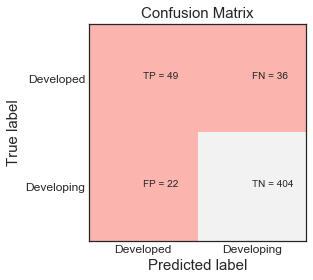

In [17]:
print(cr)
plotConfusion(cm)

In [18]:
#Logistic Regression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8149889024275169
Accuracy Score:  0.8003913894324853


In [19]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8595821588658085
Accuracy Score:  0.8669275929549902


[0.8595821588658085, 0.8692090507519145, 0.8585202258585773, 0.880950664332063, 0.8737215577715468, 0.8754133332187471, 0.8811936578936858, 0.8829048601989116, 0.8853623014763636, 0.8860776381630469, 0.8779308391791618, 0.8821401205867772]


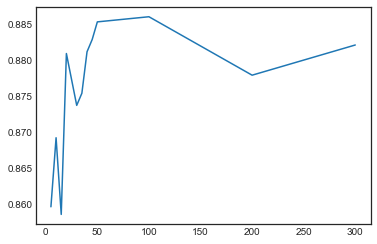

In [20]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [21]:
model = ExtraTreesClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8860776381630469
Accuracy Score:  0.8923679060665362


[0.8779734856037219, 0.8888188858597275, 0.8796366100587898, 0.8745409216416911, 0.8804278583774429, 0.8836450945789212, 0.8944950880475574, 0.8915341830202241, 0.8921603940892726, 0.8857280589494465, 0.9008601676557795]


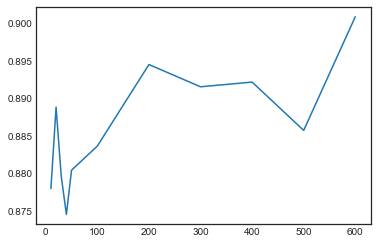

In [22]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=100,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [23]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=100,max_features=600,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

F1 Score:  0.9008601676557795
Accuracy Score:  0.9041095890410958
             precision    recall  f1-score   support

          0       0.75      0.64      0.69        85
          1       0.93      0.96      0.94       426

avg / total       0.90      0.90      0.90       511



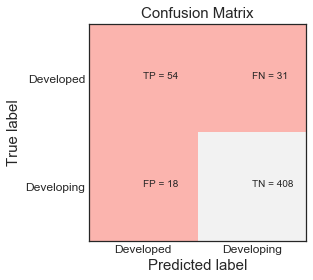

In [26]:
plotConfusion(cm)

In [27]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 389
Best features : Index(['normalized__approximate_entropy__m_2__r_0.5',
       'normalized__approximate_entropy__m_2__r_0.7',
       'normalized__approximate_entropy__m_2__r_0.9',
       'normalized__ar_coefficient__k_10__coeff_0',
       'normalized__ar_coefficient__k_10__coeff_1',
       'normalized__ar_coefficient__k_10__coeff_2',
       'normalized__ar_coefficient__k_10__coeff_3',
       'normalized__ar_coefficient__k_10__coeff_4',
       'normalized__augmented_dickey_fuller__attr_"pvalue"',
       'normalized__augmented_dickey_fuller__attr_"teststat"',
       ...
       'normalized__quantile__q_0.2', 'normalized__quantile__q_0.3',
       'normalized__quantile__q_0.4', 'normalized__quantile__q_0.6',
       'normalized__quantile__q_0.7', 'normalized__quantile__q_0.8',
       'normalized__quantile__q_0.9', 'normalized__range_count__max_1__min_-1',
       'normalized__ratio_beyond_r_sigma__r_0.5',
       'normalized__ratio_beyond_r_sigma__r_1'],
      dt

In [28]:
cols = X_train.columns[rfecv.support_]
X = X[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

[0.8356164383561644, 0.7788649706457925, 0.863013698630137, 0.8493150684931506, 0.8590998043052838, 0.8493150684931506, 0.8493150684931506, 0.8454011741682974, 0.8336594911937377, 0.8356164383561644, 0.8395303326810176, 0.837573385518591, 0.8356164383561644, 0.837573385518591, 0.8336594911937377]


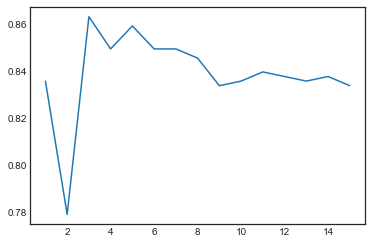

In [29]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print(f1_score(y_test,pred,average='weighted'))
print(accuracy_score(y_test,pred))

             precision    recall  f1-score   support

          0       0.62      0.45      0.52        85
          1       0.90      0.95      0.92       426

avg / total       0.85      0.86      0.85       511

0.8536310752486393
0.863013698630137


[0.8513222858579148, 0.8684879775025649, 0.8728748581150665, 0.8711900563787046, 0.8677330031817031, 0.8598500924725929, 0.8660629481283524, 0.8608469572674023, 0.8582042978917869, 0.8598500924725929, 0.8615029177507917, 0.8694102214355621]


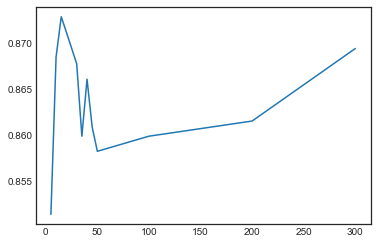

In [31]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [32]:
rf_classifier = RandomForestClassifier(n_estimators=15, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.72      0.48      0.58        85
          1       0.90      0.96      0.93       426

avg / total       0.87      0.88      0.87       511



###### we have not still got good results because of class imbalances. Lets try Sampling 

In [33]:
df.label.value_counts()

1    1070
0     207
Name: label, dtype: int64

In [116]:
df_0 = df [df['label'] == 0]

In [117]:
df_0.shape

(138, 797)

In [118]:
df_0 = df_0.sample(716,replace=True)

In [119]:
df_0.shape

(716, 797)

In [120]:
df_1 = df [df['label'] == 1]

In [121]:
df = pd.concat([df_0,df_1])

In [122]:
df.shape

(1432, 797)

In [123]:
y = df['label']
X = df.drop(columns=['Unnamed: 0', 'id','label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

[0.9245992655743992, 0.8611326908492933, 0.8430986972479783, 0.7957197611611538, 0.7940754983349141, 0.7360731166559633, 0.7545546457914264, 0.7066712103291972, 0.7181245649167517, 0.6914260148069542, 0.7112856716859719, 0.6917877098220916, 0.7026628730501037, 0.6897597412605758, 0.6900453535094038]


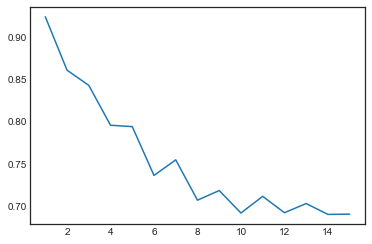

In [125]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,scores)    
print(scores) 

In [132]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)

             precision    recall  f1-score   support

          0       0.79      0.94      0.86       289
          1       0.93      0.75      0.83       284

avg / total       0.86      0.84      0.84       573



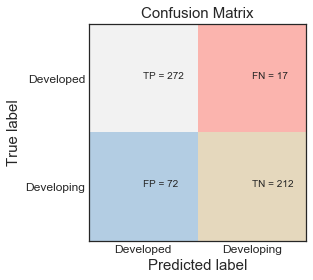

In [133]:
plotConfusion(cm)

F1 Score:  0.9510457779567727
Accuracy Score:  0.9511343804537522
             precision    recall  f1-score   support

          0       0.92      0.99      0.95       289
          1       0.99      0.91      0.95       284

avg / total       0.95      0.95      0.95       573



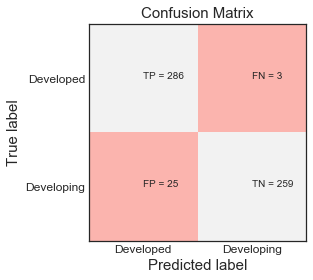

In [135]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
plotConfusion(confusion_matrix(y_test,pred))

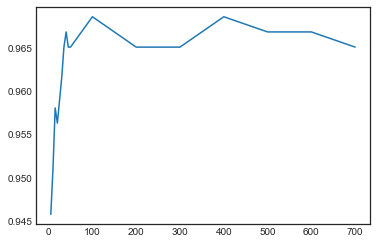

In [137]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300,400,500,600,700]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       289
          1       0.99      0.95      0.97       284

avg / total       0.97      0.97      0.97       573



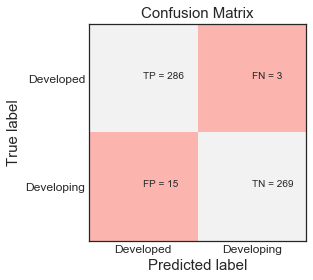

In [140]:
rf_classifier = RandomForestClassifier(n_estimators=400, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print(classification_report(y_test,pred))
plotConfusion(confusion_matrix(y_test,pred))

[0.9703156720393004, 0.9633172574595902, 0.9685668520822709, 0.9668175311144455, 0.9633172574595902, 0.9650676769725289, 0.9633172574595902, 0.9633172574595902, 0.9615662403430824, 0.959814593352853, 0.9633172574595902]


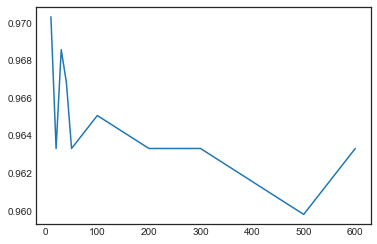

In [142]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=400,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

0.9703156720393004
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       289
          1       0.99      0.95      0.97       284

avg / total       0.97      0.97      0.97       573



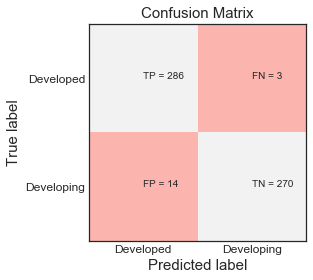

In [146]:
rf_classifier = RandomForestClassifier(max_features = 10 ,n_estimators=400,random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print(f1_score(y_test,pred,average='weighted'))
print(classification_report(y_test,pred))
plotConfusion(confusion_matrix(y_test,pred))

[0.9668175311144455, 0.9650676769725289, 0.9755594470155878, 0.9720640231171753, 0.9720640231171753, 0.9773065839588784, 0.9755594470155878, 0.9790533802724514, 0.9773065839588784, 0.9773065839588784, 0.9738119374178549, 0.9755594470155878]


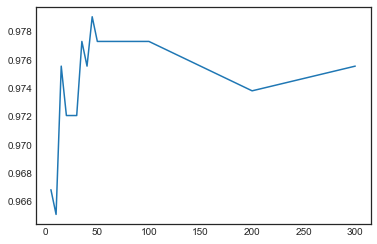

In [147]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       289
          1       0.99      0.97      0.98       284

avg / total       0.98      0.98      0.98       573



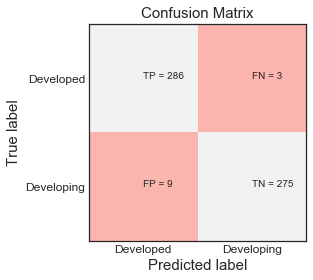

In [149]:
model = ExtraTreesClassifier(n_estimators=45,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test,pred))
plotConfusion(confusion_matrix(y_test,pred))

[0.9720640231171753, 0.9773065839588784, 0.9790533802724514, 0.9738119374178549, 0.9738119374178549, 0.9703156720393004, 0.9755594470155878, 0.9738119374178549, 0.9720640231171753, 0.9738119374178549, 0.9720640231171753]


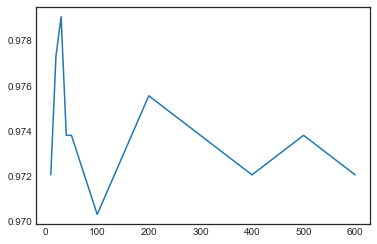

In [150]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=45,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [151]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=45,max_features=30,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

F1 Score:  0.9790533802724514
Accuracy Score:  0.9790575916230366
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       289
          1       0.99      0.97      0.98       284

avg / total       0.98      0.98      0.98       573



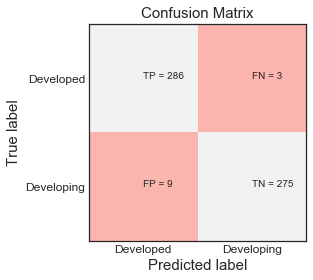

In [152]:
plotConfusion(cm)

In [153]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6676529779417418
Accuracy Score:  0.6684118673647469


In [60]:
# pca = PCA(n_components=2)  
# X_train_pca = pca.fit_transform(X_train)  
# X_test_pca = pca.transform(X_test) 

In [64]:
# #KNN
# knn = KNeighborsClassifier(n_neighbors=2)
# knn.fit(X_train_pca,y_train)
# pred = knn.predict(X_test_pca)
# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))